In [1]:
import sys, getopt

import pandas as pd
import numpy as np

import re
import os

from style_feature import Style_Feature

from sklearn.externals import joblib

from read_path import load_img

from operator import itemgetter
import matplotlib.pyplot as plt
import cv2 


In [2]:
def     read(data_path, style_obj):
    data = None
    print "Load %s" % data_path
    data = pd.read_csv(data_path)    
    imgs = [load_img(img_path) for img_path in data['img_path'] if os.path.exists(img_path)]
    imgs = [img for img in imgs if img is not None]
    features = np.array([style_obj.get_feature(img) for img in imgs])    
    return features, data['img_path']

In [3]:
data_path = '/home/anla/Source/data/images/sample_4k.csv'
style_obj = Style_Feature(lab = 1, gist = 1, gist_processmodel = None)    
features, img_path = read(data_path, style_obj)

Load /home/anla/Source/data/images/sample_4k.csv


/home/anla/Apps/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [5]:
from clustering import clustering
from cluster.visualize import transform
from sklearn import svm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.cm as cm

In [6]:
# features = features.reshape(400, 8)

In [7]:
cluster_folder = '/home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab'

In [8]:

def visualize(features, P, cluster_labels, n_cluster, out_path):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(features) + (n_cluster + 1) * 10])

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(features, cluster_labels)

    y_lower = 10
    for i in range(n_cluster):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    silhouette_avg = silhouette_score(features, cluster_labels)    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    tx = [i[0] for i in P]
    txmin, txmax = np.min(tx), np.max(tx)
    tx = [(i[0] - txmin)/(txmax - txmin) for i in P]
    
    ty = [i[1] for i in P]
    tymin, tymax = np.min(ty), np.max(ty)
    ty = [(i[1] - tymin)/(tymax - tymin) for i in P]
    
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 1])
    colors = cm.spectral(cluster_labels.astype(float) / n_cluster)
    ax2.scatter(tx, ty, marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.savefig('%s/cluster.png' % out_path, bbox_inches='tight')
    plt.show()

In [9]:
glb_features = features

In [10]:
drop_idx = [i for i in range(len(glb_features)) if glb_features[i] is None]
if len(drop_idx) > 0:
    glb_features = np.delete(glb_features,drop_idx,axis=0)
    
features = np.zeros((len(glb_features), len(glb_features[0])))
for i in range(len(glb_features)):
    for j in range(len(glb_features[i])):
        features[i][j] = glb_features[i][j]
print (features.shape)

(3999, 1296)


48
Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/spherical_48
    [83, 70, 127, 65, 151, 71, 57, 51, 83, 94, 82, 104, 81, 68, 89, 93, 67, 86, 107, 120, 105, 96, 50, 71, 68, 98, 79, 92, 79, 92, 111, 80, 127, 48, 8, 72, 106, 88, 118, 74, 118, 84, 4, 81, 71, 90, 43, 97]
For n_clusters=48, Average Silhouette Coefficient is -0.014988949422


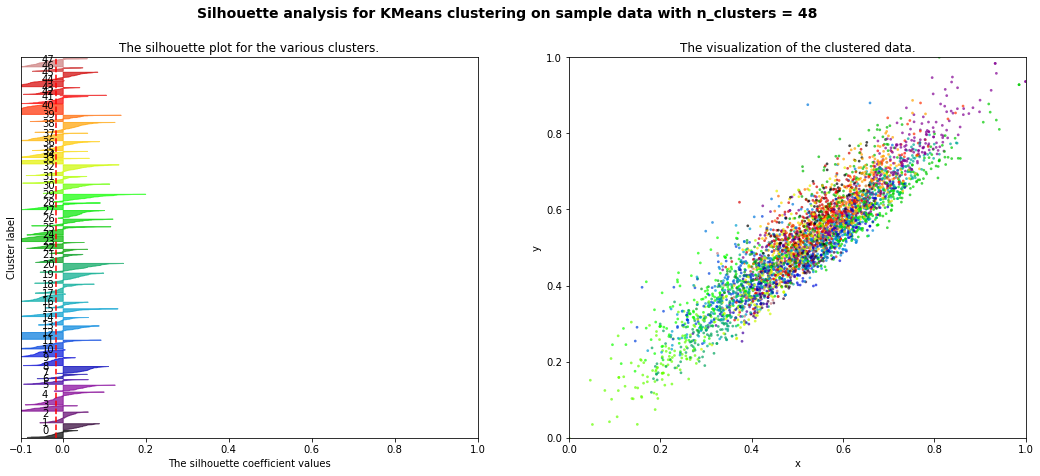

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/diag_48
    [38, 45, 66, 24, 212, 255, 59, 69, 35, 23, 42, 141, 60, 25, 83, 62, 34, 48, 25, 64, 113, 59, 8, 60, 71, 22, 50, 63, 298, 101, 61, 52, 110, 174, 47, 148, 71, 189, 103, 219, 269, 8, 18, 54, 90, 15, 53, 63]
For n_clusters=48, Average Silhouette Coefficient is -0.053015981047


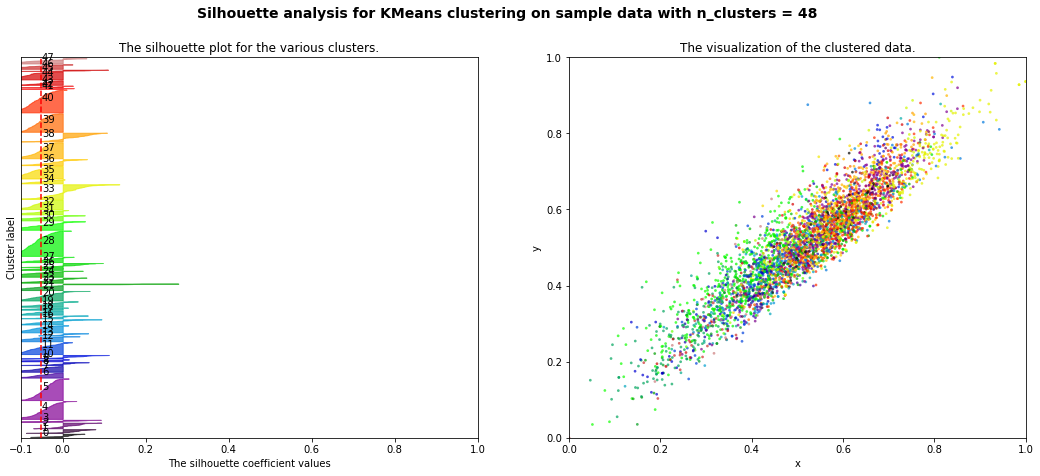

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/full_48
    [124, 95, 108, 22, 12, 65, 86, 91, 214, 77, 87, 119, 55, 89, 59, 91, 112, 76, 86, 87, 126, 92, 62, 68, 53, 77, 88, 124, 88, 56, 53, 77, 99, 62, 78, 63, 62, 102, 110, 134, 61, 85, 109, 86, 86, 25, 44, 74]
For n_clusters=48, Average Silhouette Coefficient is 0.0138174405997


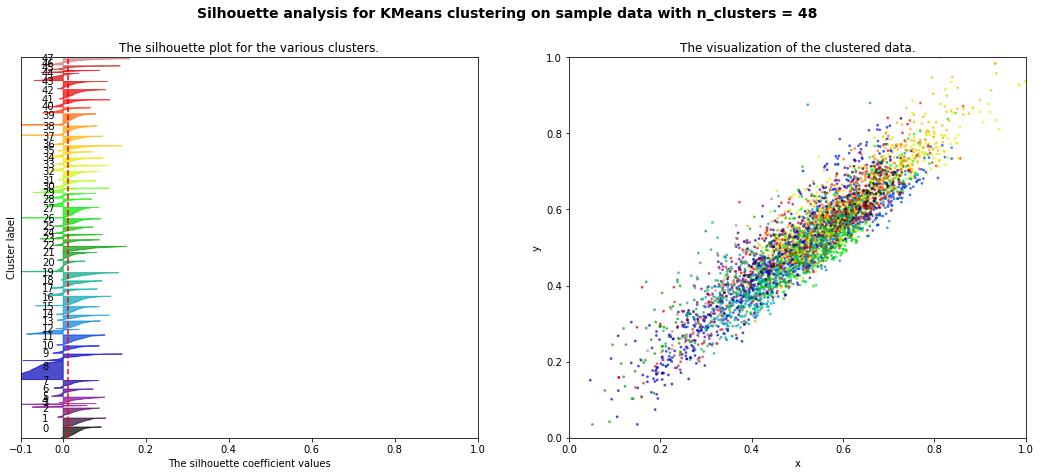

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/tied_48
    [115, 59, 58, 45, 122, 54, 33, 23, 198, 44, 21, 316, 28, 46, 45, 21, 39, 70, 58, 149, 268, 111, 43, 60, 33, 17, 32, 140, 231, 18, 9, 50, 11, 45, 58, 39, 33, 67, 227, 73, 35, 92, 538, 68, 18, 69, 43, 27]
For n_clusters=48, Average Silhouette Coefficient is -0.044847090037


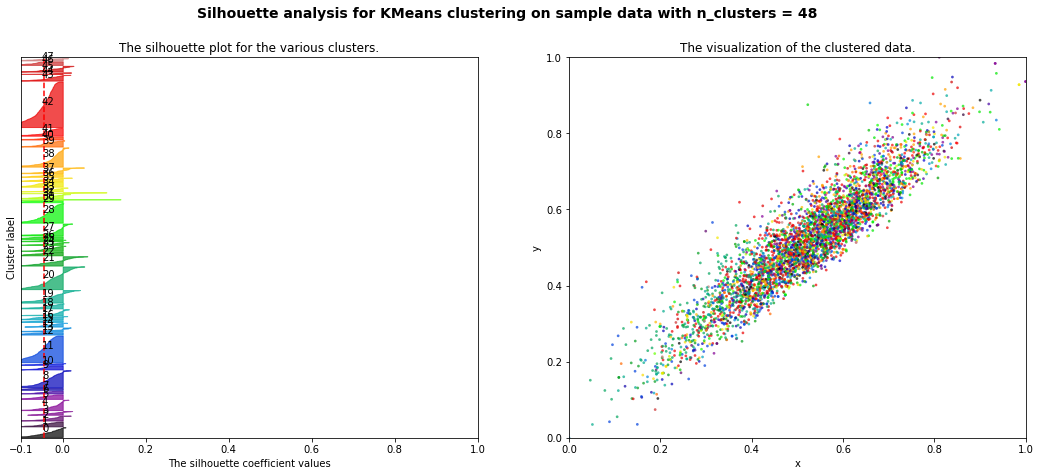

64
Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/spherical_64
    [124, 70, 55, 87, 75, 77, 62, 28, 52, 53, 61, 57, 40, 48, 115, 103, 81, 67, 23, 48, 23, 74, 57, 56, 53, 79, 69, 26, 103, 67, 108, 64, 76, 61, 116, 45, 43, 73, 53, 1, 68, 116, 9, 69, 53, 57, 30, 38, 67, 52, 47, 65, 30, 97, 10, 45, 54, 47, 53, 73, 105, 106, 62, 73]
For n_clusters=64, Average Silhouette Coefficient is -0.0205905691218


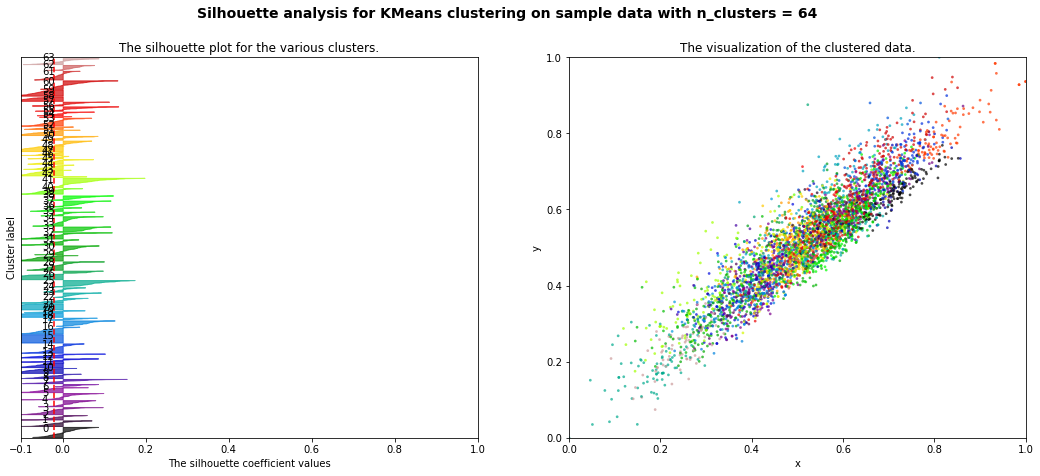

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/diag_64
    [0, 80, 20, 51, 45, 199, 17, 28, 12, 20, 171, 95, 270, 63, 171, 15, 61, 27, 0, 149, 81, 65, 43, 25, 104, 70, 55, 41, 33, 27, 48, 15, 54, 2, 61, 46, 73, 8, 25, 76, 30, 1, 42, 35, 42, 96, 40, 30, 153, 0, 15, 73, 25, 0, 340, 42, 20, 13, 68, 113, 126, 237, 10, 2]
For n_clusters=64, Average Silhouette Coefficient is -0.0599660481205


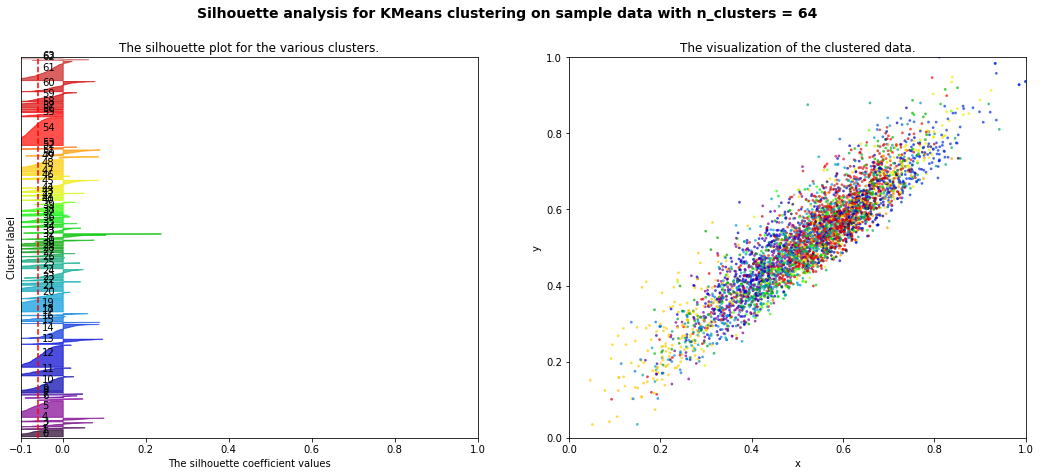

Generate folder /home/anla/Source/python/style_feature_extraction/cluster/GMM/gist-lab/full_64
    [0, 119, 39, 52, 63, 60, 60, 101, 36, 89, 30, 63, 70, 83, 103, 8, 116, 92, 34, 44, 62, 39, 78, 87, 65, 48, 63, 90, 46, 65, 93, 49, 46, 35, 53, 90, 58, 111, 80, 52, 180, 0, 76, 43, 31, 111, 120, 15, 31, 0, 67, 117, 101, 0, 44, 143, 25, 50, 7, 54, 28, 61, 93, 30]


IOError: [Errno 28] No space left on device

In [11]:
for n_cluster in [48, 64]:
    print n_cluster
    estimators = dict((cov_type, GaussianMixture(n_components=n_cluster,
                   covariance_type=cov_type, max_iter=200, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full']) 

    n_estimators = len(estimators)
    
    label_init = np.random.randint(0, n_cluster, len(features))
    
    label_pred = None
    for index, (name, estimator) in enumerate(estimators.items()):
        estimator.means_init = np.array([features[label_init == i].mean(axis=0) for i in range(n_cluster)])
        estimator.fit(features)
        label = estimator.predict(features)
        clusters = [np.where(label == i)[0] for i in range(n_cluster)]

        folder = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        print 'Generate folder %s' % folder
        print '   ', [len(cluster) for cluster in clusters]
        os.makedirs(folder)
        clustering(clusters, folder, img_path, visualize_mode = True)
    
        P = transform(features)
        sil_coef_avg = silhouette_score(features, label, metric='euclidean')
        print("For n_clusters={}, Average Silhouette Coefficient is {}".format(n_cluster, sil_coef_avg))

#         model = '%s/%s_%d' % (cluster_folder, name, n_cluster)
        visualize(features, P, label, n_cluster, '%s/%s_%d/' % (cluster_folder, name, n_cluster))    
